# Mega Case Study - Making a hybrid Deep Learning Model

# Part 1 - SOM

## Install MiniSom Package

In [1]:
!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [8]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate =0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results

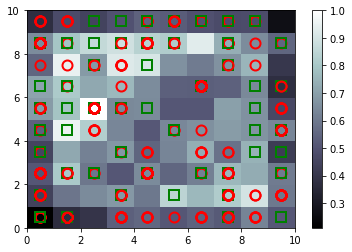

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None',
         markersize=10, markeredgewidth=2)
show()

## Finding the frauds


In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2, 5)], mappings[(1,7)]), axis=0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15776156
15636767
15690772
15783859
15713983
15709252
15701885
15753550
15745804
15648681
15724851
15787229
15763194
15713160
15666012
15740411
15735330
15809909
15710138
15758477
15613673
15790689
15717700


# Part 2 - Going from Unsupervised to Supervised Deep Learning

## Create Matrix of Features

In [12]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [13]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Part 3 - ANN

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

## Import Tensorflow

In [15]:
import tensorflow as tf
tf.__version__

'2.3.0'

## Initializing the ANN

In [16]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [19]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the ANN on the Training set

In [20]:
ann.fit(customers, is_fraud, batch_size=1, epochs=10)

Epoch 1/10
690/690 [==============================] - 0s 529us/step - loss: 0.4116 - accuracy: 0.9667
Epoch 2/10
690/690 [==============================] - 0s 502us/step - loss: 0.2027 - accuracy: 0.9667
Epoch 3/10
690/690 [==============================] - 0s 528us/step - loss: 0.1340 - accuracy: 0.9667
Epoch 4/10
690/690 [==============================] - 0s 534us/step - loss: 0.1106 - accuracy: 0.96670s - loss: 0.0940 - ac
Epoch 5/10
690/690 [==============================] - 0s 517us/step - loss: 0.1010 - accuracy: 0.96670s - loss: 0.1011 - accuracy: 0.96
Epoch 6/10
690/690 [==============================] - 0s 542us/step - loss: 0.0956 - accuracy: 0.9667
Epoch 7/10
690/690 [==============================] - 0s 558us/step - loss: 0.0917 - accuracy: 0.96670s - loss: 0.0906 - accuracy: 0.96
Epoch 8/10
690/690 [==============================] - 0s 534us/step - loss: 0.0891 - accuracy: 0.9667
Epoch 9/10
690/690 [==============================] - 0s 521us/step - loss: 0.0866 - accuracy:

## Predicting test set results

In [21]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [22]:
print(y_pred)

[[1.57997850e+07 6.90120601e-07]
 [1.56214230e+07 1.21763753e-06]
 [1.57005110e+07 2.98882651e-06]
 ...
 [1.56732380e+07 2.83238351e-01]
 [1.57627990e+07 2.83238351e-01]
 [1.56808950e+07 2.83238351e-01]]
